# 0 IMPORTS

In [108]:
# data handling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns

# model building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
print("TensorFlow version :", tf.__version__)

TensorFlow version : 2.6.0


# 1 Loading the dataset

In [5]:
file_path = '/content/data.csv'
df = pd.read_csv(file_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# drop last column (extra column added by pd)
# and unnecessary first column (id)
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)

In [8]:
# 'diagnosis' is class label(target) B for benign and M for malignant
# let us observe the distribution of class label
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Let us understand feature columns. `df.describe()` function fetches you descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.


In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In above statistical description, we can observe the values across feature columns fall in varying scale. Normalization is one of the many feature engineering techniques that we are going to use. Normalization is the process of converting a range of values, into a standard range of values, typically in the interval [−1, 1] or [0, 1].


In [10]:
label = df.loc[:,'diagnosis']
Y = {'M':1,'B':0}
Y = label.map(Y)
X = df.iloc[:,1:]

X_normalized = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X_normalized)

In [69]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [73]:
blah = tf.convert_to_tensor(X)
blah.shape

TensorShape([569, 30])

# 2 MODEL BUILDING
We are going to adress a classification problem of predicting the class labels of a breast cancer dataset i.e, a given instance is Malignant(1) or Benign(0).
For this problem we are going to train a Sequential model of Keras API in TensorFlow. 
Here, we will try to find out the best set of hyperparameters that minimizes the loss function to the maximum extend. In other words, we will look for the parameter set that provides the most accurate solution using Keras Tuner

In [107]:
 X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

First let us build a model by manually selecting hyperparameters and observe how the model could learn.

In [109]:
model = keras.Sequential([
        layers.Dense(128, activation = 'relu',input_shape= [30]),
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1,activation='sigmoid')# 'sigmoid activation'
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Since we are adressing a binary classification problem, 
#we use 'binary crossentropy'

history = model.fit(
          X_train,Y_train,
          validation_split=0.1,
          batch_size=32,
          epochs = 200,
)

Epoch 1/200
13/13 [==============================] - 1s 19ms/step - loss: 0.6729 - accuracy: 0.5477 - val_loss: 0.6346 - val_accuracy: 0.8043
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5923 - accuracy: 0.8900 - val_loss: 0.5251 - val_accuracy: 0.9348
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.4535 - accuracy: 0.9169 - val_loss: 0.3541 - val_accuracy: 0.9130
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.9120 - val_loss: 0.2244 - val_accuracy: 0.8913
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.2051 - accuracy: 0.9193 - val_loss: 0.1942 - val_accuracy: 0.9348
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.1652 - accuracy: 0.9193 - val_loss: 0.1356 - val_accuracy: 0.9348
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 0.1370 - accuracy: 0.9462 - val_loss: 0.1329 - val_accuracy: 0.9348
Epoch 8/200


# 3 Model evaluation

In [110]:
# making prediction results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

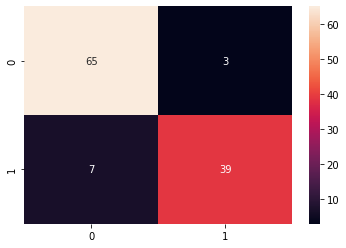

In [113]:
# constructing confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [116]:
# model metrics
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

tn, fn, fp, tp=cm  .ravel()
sens=tp/(tp+fn)
spec=tn/(tn+fp)
print("Senstivity:",sens)
print("Specificity:",spec)

Accuracy: 91.22807017543859%
Senstivity: 0.9285714285714286
Specificity: 0.9027777777777778
